- There are typically two ways to produce a list of recommendations:

* Collaborative filtering

* Content-based filtering

The collaborative filtering method is based on previous user behaviors, such as pages that
they viewed, products that they purchased, or ratings that they have given to different
items. The collaborative filtering approach then uses this data to find similarities between
users or items, and recommends the most similar items or contents to the users. The basic
assumption behind the collaborative filtering method is that those who have viewed or
purchased similar contents or products in the past are likely to view or purchase similar
kinds of contents or products in the future. Thus, based on this assumption, if one person
purchased items A, B, and C and another person purchased items A, B, and D in the past,
then the first person is likely to purchase item D and the other person is likely to purchase
the item C, as they share lots of similarities between them.

Content-based filtering, on the other hand, produces a list of recommendations based on
the characteristics of an item or a user. It typically looks at the keywords that describe the
characteristics of an item. The basic assumption behind the content-based filtering method
is that the users are likely to view or purchase items that are similar to those items that they
have bought or viewed in the past. For example, if a user has listened to some songs in the
past, then the content-based filtering method will recommend similar kinds of songs that
share similar characteristics to those songs that the user has already listened to.

# Collaborative filtering

The first step to implementing a collaborative filtering algorithm for a product
recommendation system is building a user-to-item matrix. A user-to-item matrix comprises
individual users in the rows and individual items in the columns.

With this user-to-item matrix, the next step to building a collaborative filtering-based
product recommender system is to compute similarities between users. To measure the
similarities, cosine similarity is frequently used.

Lastly, when using a collaborative filtering algorithm for product recommendations, there
are two approaches that you can take—a user-based approach and an item-based approach.

In [1]:
from mailcap import subst

import pandas as pd
from fontTools.subset import subset

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_40823/3121106201.py:1: DeprecationWarning: The mailcap module is deprecated and will be removed in Python 3.13. See the mimetypes module for an alternative.
  from mailcap import subst


In [6]:
df = pd.read_excel(io='Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df = df.loc[df['Quantity']>0]
df.shape

(531285, 8)

# Data Preperation

- Handle NaNs in CustomerID field

In [9]:
! pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


<AxesSubplot: >

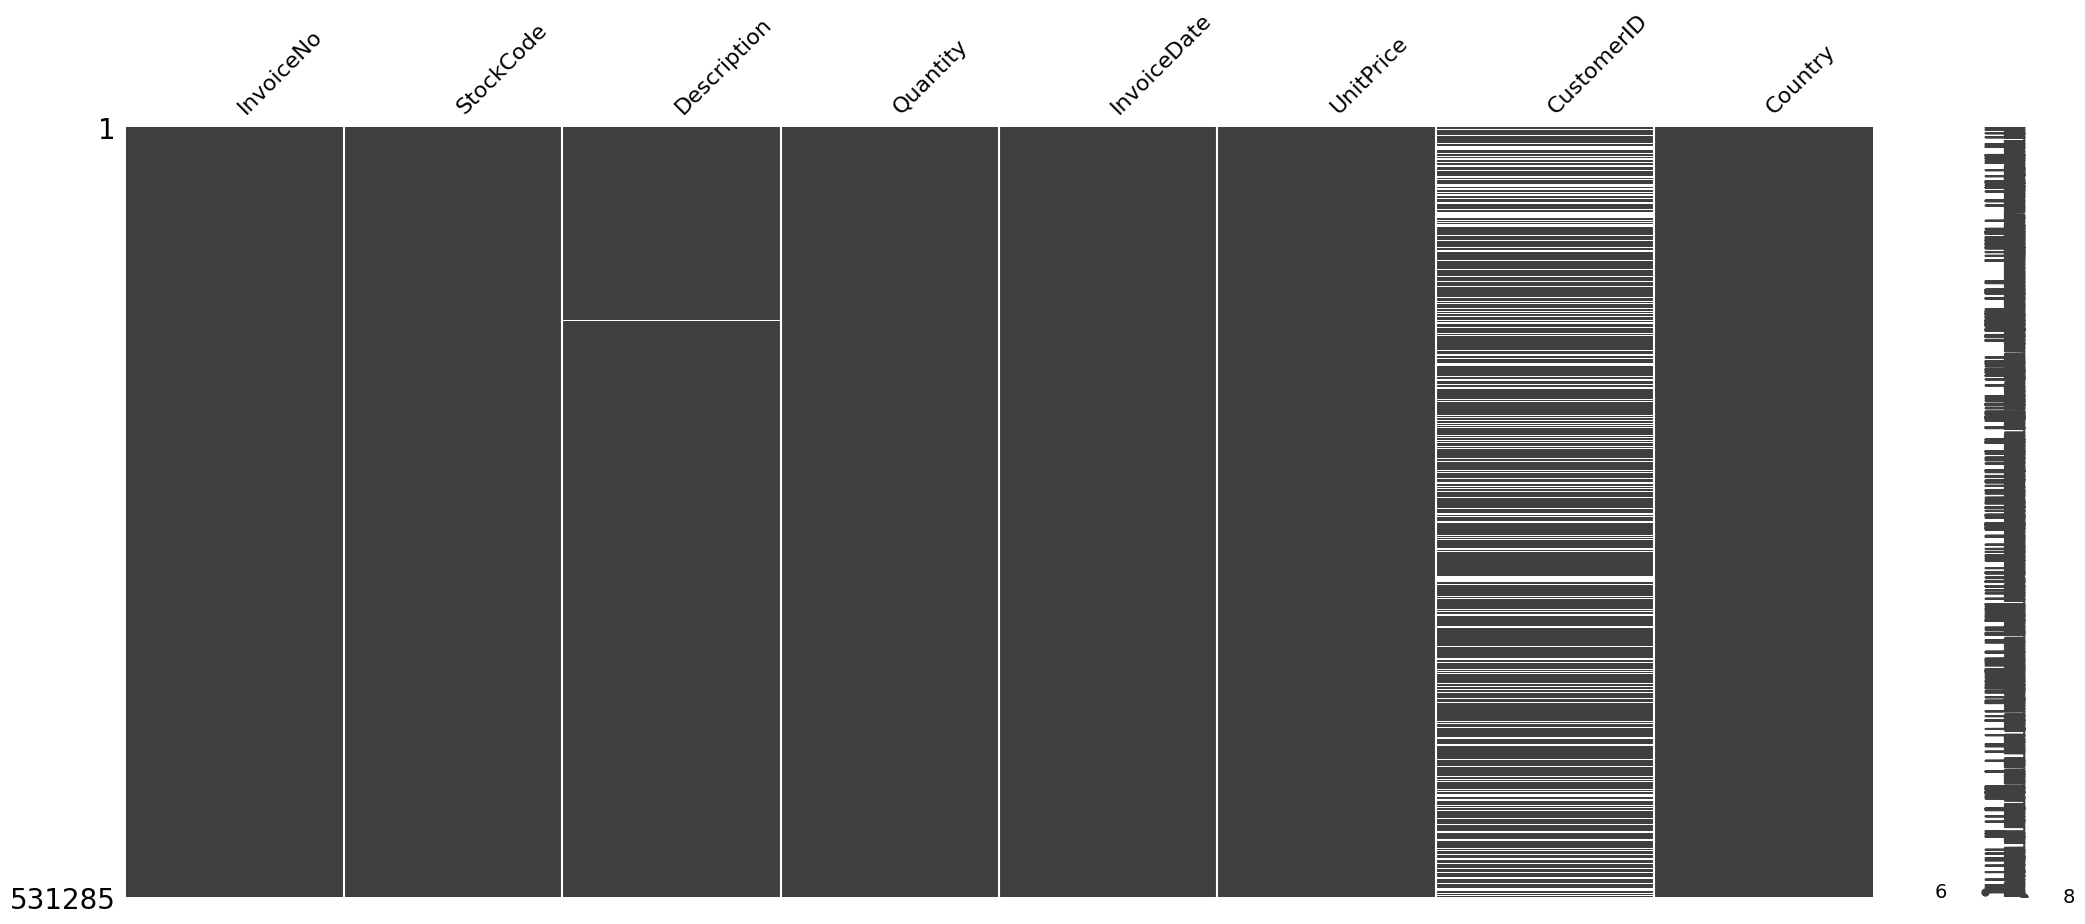

In [10]:
import missingno as msn
msn.matrix((df))

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [12]:
df = df.dropna(subset=['CustomerID'])
df.shape

(397924, 8)

- Customer-Item Matrix

In [13]:
customer_item_matrix = df.pivot_table(
    values='Quantity',
    columns='StockCode',
    index='CustomerID',
    aggfunc='sum'
)
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
customer_item_matrix.shape

(4339, 3665)

In [15]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Collaborative Filtering

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# 3.1. User-based Collaborative Filtering

- User-to-User Similarity Matrix

In [17]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(
    customer_item_matrix
))

user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [18]:
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

In [19]:
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


- Making Recommendations

In [20]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
             ...   
14885.0    0.000000
14886.0    0.000000
14887.0    0.000000
14888.0    0.000000
18287.0    0.000000
Name: 12350.0, Length: 4339, dtype: float64

* These are the top 10 customers that are the most similar to customer 12350. Let's pick
customer 17935 and discuss how we can recommend products using these results. The
strategy is as follows. First, we need to identify the items that the customers 12350 and
17935 have already bought. Then, we are going to find the products that the target
customer 17935 has not purchased, but customer 12350 has. Since these two customers
have bought similar items in the past, we are going to assume that the target
customer 17935 has a high chance of purchasing the items that he or she has not bought,
but customer 12350 has bought. Lastly, we are going to use this list of items and
recommend them to the target customer 17935.

Let's first take a look at how we can retrieve the items that the customer 12350 has
purchased in the past. The code looks as follows:

In [21]:
customer_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
items_bought_by_A = set(
    customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]>0].index
)
items_bought_by_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [23]:
items_bought_by_B = set(
    customer_item_matrix.loc[17935.0][customer_item_matrix.loc[17935.0] > 0].index
)
items_bought_by_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

In [24]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_to_recommend_to_B

{20615,
 20652,
 21171,
 21832,
 21864,
 21908,
 21915,
 22348,
 22412,
 22620,
 '79066K',
 '79191C',
 '84086C'}

In [25]:
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B),
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


# 3.2. Item-based Collaborative Filtering

In [28]:
item_item_sim_matrix = pd.DataFrame(
  cosine_similarity(customer_item_matrix.T)
)
item_item_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.066915,0.000000,0.078217
1,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016182,0.000000,0.000000
2,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.070535,0.000000,0.010993
3,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.070535,0.000000,0.070669
4,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.0,0.0,0.0,0.0,0.0,0.036955,0.0,0.070185,0.049752,0.021877


In [29]:
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

item_item_sim_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.066915,0.000000,0.078217
10080,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016182,0.000000,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.070535,0.000000,0.010993
10125,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.070535,0.000000,0.070669
10133,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.0,0.0,0.0,0.0,0.0,0.036955,0.0,0.070185,0.049752,0.021877


In [33]:
top_10_similar_items = list(
  item_item_sim_matrix\
    .loc[23166]\
      .sort_values(ascending=False)\
        .iloc[:10]\
          .index
)

top_10_similar_items

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]

In [ ]:
df.loc[
  df['StockCode'].isin(top_10_similar_items),
  ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
23166,MEDIUM CERAMIC TOP STORAGE JAR
23165,LARGE CERAMIC TOP STORAGE JAR
23167,SMALL CERAMIC TOP STORAGE JAR
22993,SET OF 4 PANTRY JELLY MOULDS
23307,SET OF 60 PANTRY DESIGN CAKE CASES
22722,SET OF 6 SPICE TINS PANTRY DESIGN
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22666,RECIPE BOX PANTRY YELLOW DESIGN
23243,SET OF TEA COFFEE SUGAR TINS PANTRY
